In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('resume_dataset.csv', encoding='utf-8')

df.columns = [col.lower() for col in df.columns] 

df['structured_resume'] = ''
df.head()

,category,resume,structured_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [3]:
print("Displaying the unique categories in resume \n")
print(df['category'].unique())

Displaying the unique categories in resume 

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [4]:
print ("Displaying the unique categories of resume and number of records\n")
Datas=df['category'].value_counts()
print(Datas)

Displaying the unique categories of resume and number of records

category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


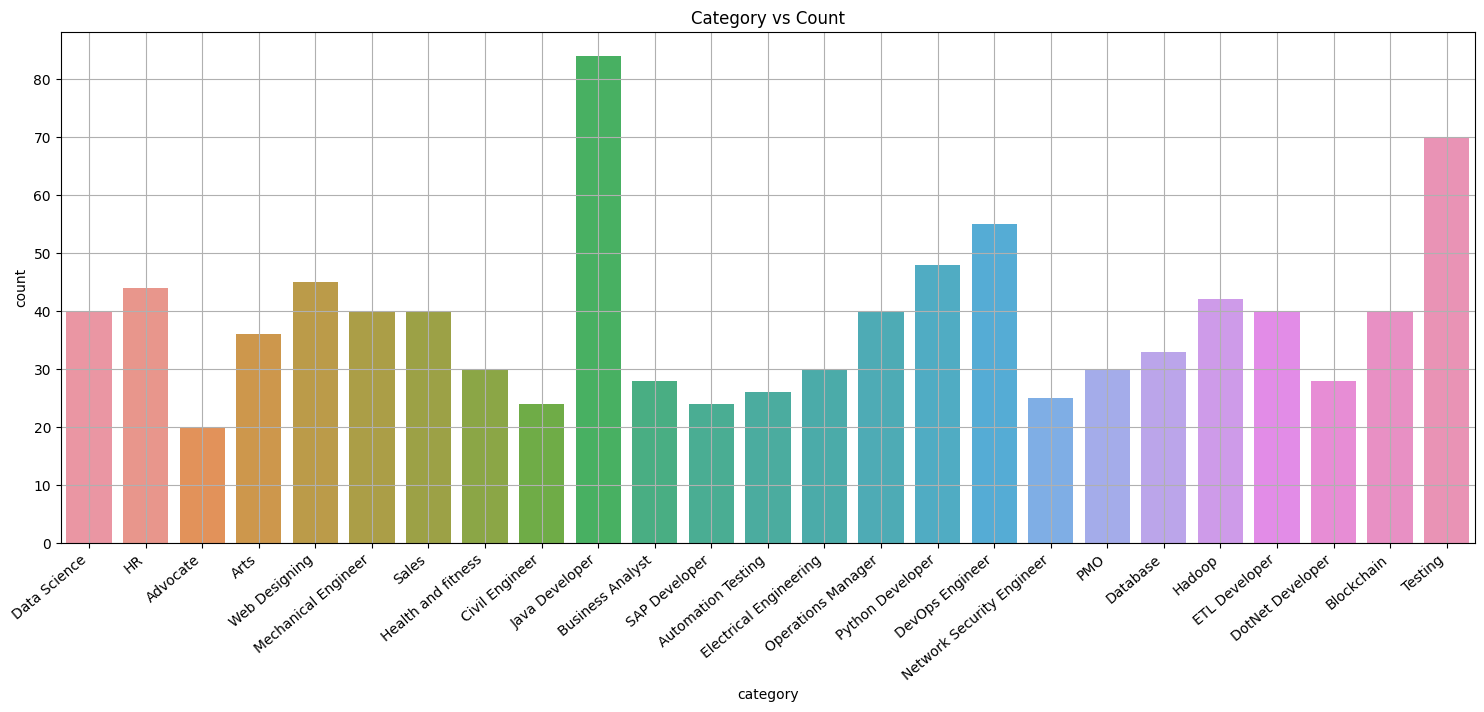

In [5]:
import seaborn as sns

plt.figure(figsize=(15,7))
ax = sns.countplot(x="category",data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Category vs Count")
plt.grid()
plt.show()

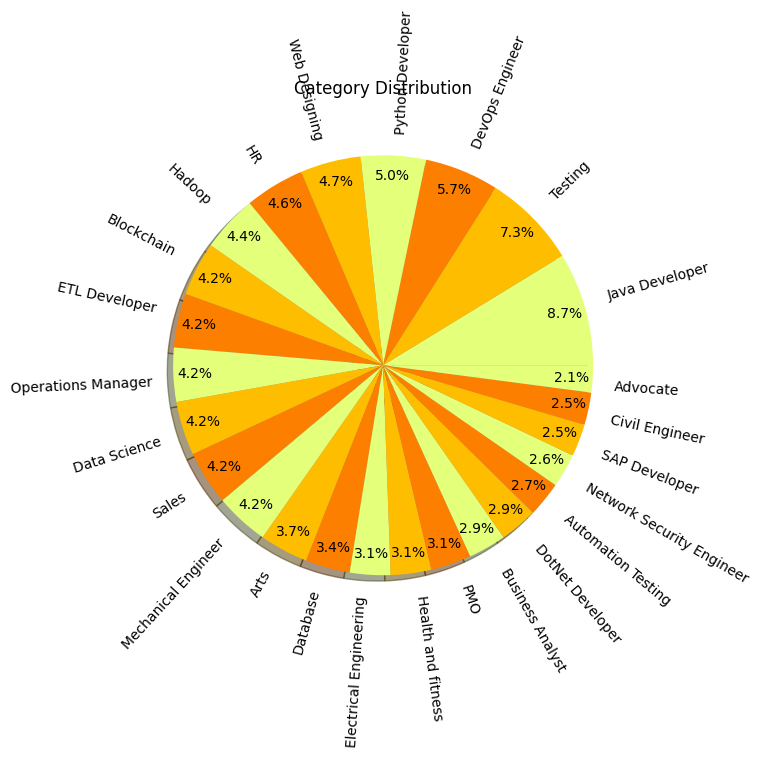

In [6]:
from matplotlib.gridspec import GridSpec

targetCount = df['category'].value_counts().values
targetLabel  = df['category'].value_counts().index


plt.figure(1, figsize=(20,15))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Wistia')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='Category Distribution')
source_pie = plt.pie(targetCount, labels=targetLabel, autopct='%1.1f%%', shadow=True, colors=colors, pctdistance=0.9, rotatelabels=90)
plt.show()

In [7]:
import regex as re

def clean_resume(Text):
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs in the text
    Text = re.sub('@\S+', '  ', Text)  # remove mentions in the text
    Text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Text)  # remove punctuations in the text
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc in the text
    Text = re.sub('#\S+', '', Text)  # remove hashtags in the text
    Text = re.sub(r'[^\x00-\x7f]',r' ',Text) 
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace in the text
    return Text
    
df['structured_resume'] = df.resume.apply(lambda x: clean_resume(x))

In [8]:
import nltk
from nltk.corpus import stopwords
import string

from wordcloud import WordCloud

# nltk.download('stopwords')
# nltk.download('punkt')

In [9]:
stopword = set(stopwords.words('english')+['``',"''"])

vocab =[]
sent = df['resume'].values
cleaned_sen = ""

for i in range(0, 160):
    cleaned_text = clean_resume(sent[i])
    cleaned_sen += cleaned_text
    required_words = nltk.word_tokenize(cleaned_text)
    for word in required_words:
        if word not in stopword and word not in string.punctuation:
            vocab.append(word)

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


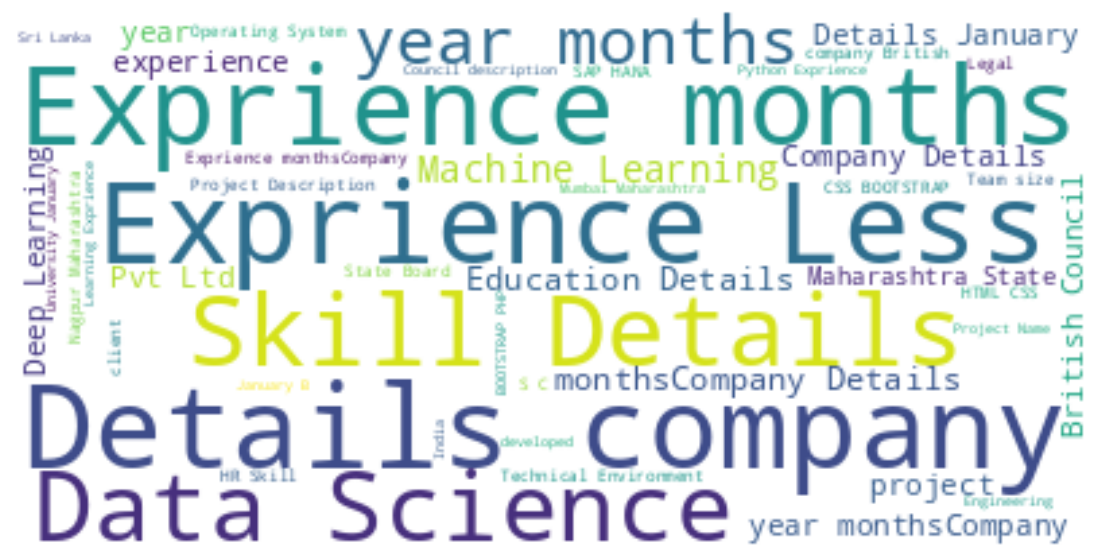

In [10]:
# Using wordcloud we are finding the frequency of words

wordfrequencydist = nltk.FreqDist(vocab)
mostCommon = wordfrequencydist.most_common(50)
print(mostCommon)

word_cloud = WordCloud(background_color="white").generate(cleaned_sen)
plt.figure(figsize=(15,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:

from sklearn.preprocessing import LabelEncoder

#Converting words in to categorical values
var_mod = ['category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [13]:
df

,category,resume,structured_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [14]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

required_text = df['structured_resume'].values
required_target = df['category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=1500)
word_vectorizer.fit(required_text)

WordFeatures = word_vectorizer.transform(required_text)
print("Feature completed")


Feature completed


In [15]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, required_target, random_state=0, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [16]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)
print("KNeighbors Classifier")
print('Accuracy on training dataset: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test dataset: {:.2f}'.format(clf.score(X_test, y_test)))

print(metrics.classification_report(y_test, prediction))

KNeighbors Classifier
Accuracy on training dataset: 1.00
Accuracy on test dataset: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00    

In [17]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)
print("KNeighbors Classifier")
print('Accuracy on training dataset: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test dataset: {:.2f}'.format(clf.score(X_test, y_test)))

print(metrics.classification_report(y_test, prediction))

KNeighbors Classifier
Accuracy on training dataset: 0.99
Accuracy on test dataset: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00    

In [18]:
clf = OneVsRestClassifier(MultinomialNB())
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)
print("KNeighbors Classifier")
print('Accuracy on training dataset: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test dataset: {:.2f}'.format(clf.score(X_test, y_test)))

print(metrics.classification_report(y_test, prediction))

KNeighbors Classifier
Accuracy on training dataset: 0.99
Accuracy on test dataset: 0.97
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      0.78      0.88         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       0.86      1.00      0.93    